### This notebook visualizes the results of calculating the Two-Plasmon Decay (TPD) response for a number of different combinations of the gradient scale length (L), electron temperature ($T_e$), and laser intensity ($I_0$). The Simon threshold is also calculated.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [66]:
df = pd.read_csv("./tpd-threshold-runs.csv")

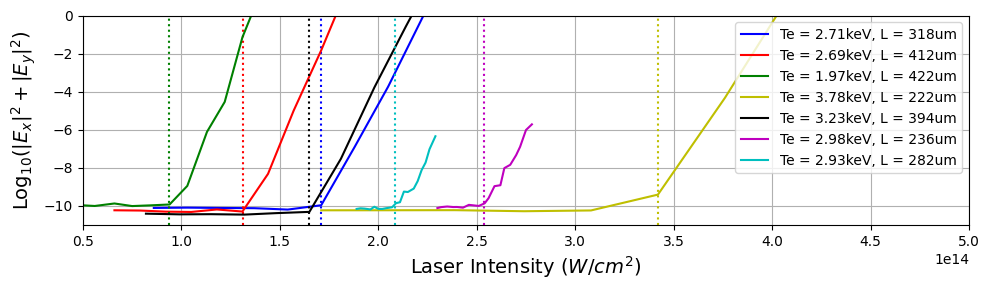

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3), tight_layout=True)
cs = ["b", "r", "g", "y", "k", "m", "c"]
for te, c in zip(df["units.reference electron temperature"].unique(), cs):

    dfh = df.where(df["units.reference electron temperature"] == te).dropna()
    ints = [float(v[:-7]) for v in dfh["units.laser intensity"]]
    L = dfh["density.gradient scale length"].iloc[0]
    # print(ints)
    # raise ValueError
    es = np.array(dfh["log10_total_e_sq"])[np.argsort(ints)]
    ints = np.sort(ints)
    # print(ints)
    
    ax.plot(ints, es, label=f"Te = {te}, L = {L}", color=c)
    ax.axvline(x=dfh["units.derived.I_thresh"].iloc[0]*1e14, color=c, linestyle=":") #, label="I$_{th}$")
    
ax.set_ylim(-11, 0)
ax.set_xlim(0.5e14, 5e14)
ax.set_xlabel("Laser Intensity ($W/cm^2$)", fontsize=14)
ax.set_ylabel("Log$_{10}(|E_x|^2 + |E_y|^2)$", fontsize=14)
ax.grid()
ax.legend()

#### Hopefully, this plot convinces you that this implementation of the LPSE eqations reproduces the Simon result for monochromatic plane waves

In [79]:
import xarray as xr

### We can also look at the plots of the electric field at various points in time.
#### These show the qualitatively different behavior of the system above and below the absolute instability threshold

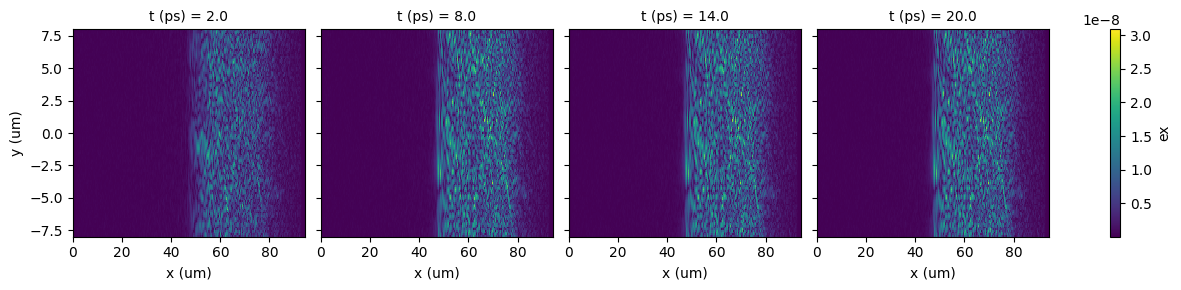

In [88]:
below = xr.open_dataset("./below_threshold.xr", engine="h5netcdf")
np.abs(below["ex"][2::6]).T.plot(col="t (ps)")

/pscratch/sd/a/archis/venvs/adept-cpu/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


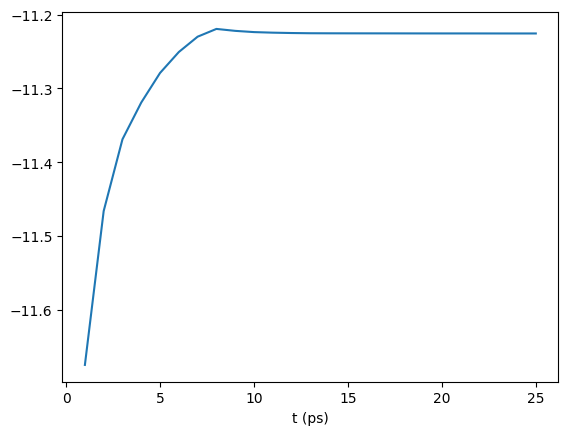

In [98]:
np.log10(np.sum(np.square(np.abs(below["ex"])) + np.square(np.abs(below["ey"])), axis=(1, 2))).T.plot()

#### Below threshold, the electric field amplitude does not grow much past the baseline noise level

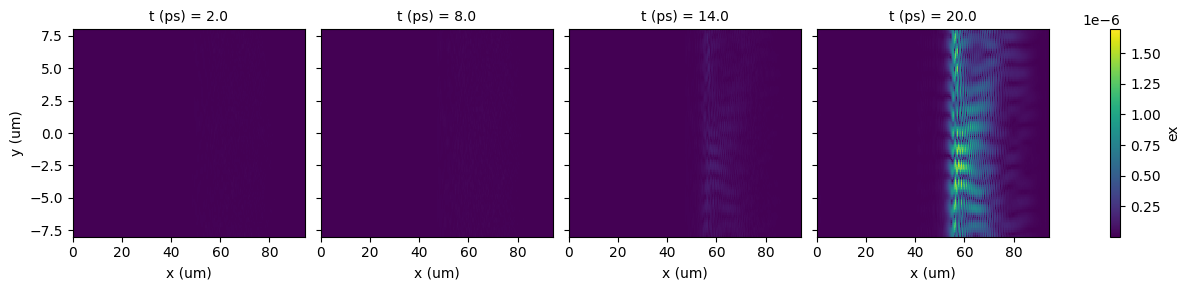

In [102]:
above = xr.open_dataset("./above_threshold.xr", engine="h5netcdf")
np.abs(above["ex"][2::6]).T.plot(col="t (ps)")

/pscratch/sd/a/archis/venvs/adept-cpu/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


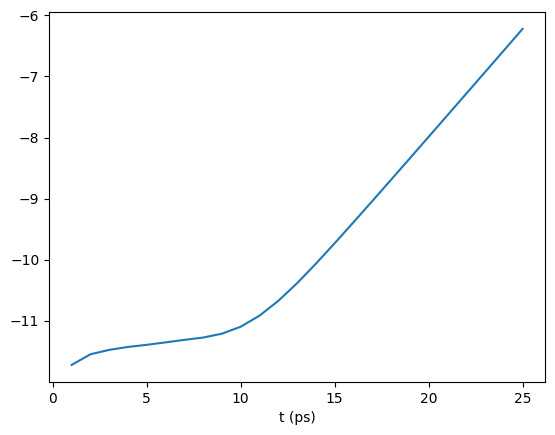

In [100]:
np.log10(np.sum(np.square(np.abs(above["ex"])) + np.square(np.abs(above["ey"])), axis=(1, 2))).T.plot()

#### Above threshold, the electric field amplitude is larger by a factor of 100 and shows exponential growth